In [19]:
import cv2
import imutils
from imutils import paths
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['image.cmap'] = 'gray'

In [20]:
def show_image(image):
    plt.imshow(image[:,:,::-1])

In [21]:
image_folder = r"C:\Users\mhasa\Google Drive\Tutorial Corner\PYTH\DeepLearning\DeepLearning-DL4CV\ImageDatasets\cellImages4"
paths = list(paths.list_images(image_folder))
selected_paths = np.random.choice(paths, size=10)

In [5]:
image = selected_paths[5]

In [23]:
image = './792.JPG'

In [24]:
# load image
image = cv2.imread(image)

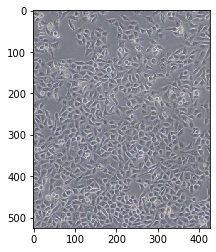

In [25]:
show_image(image)

In [26]:
B, G, R = cv2.split(image)

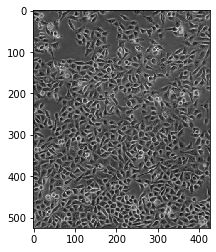

In [27]:
plt.imshow(R, cmap='gray')

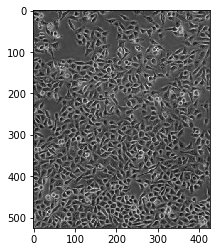

In [28]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

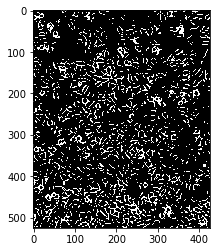

In [29]:
thresh = 160
maxVal = 255
_, thresh_image = cv2.threshold(gray, thresh, maxVal, cv2.THRESH_BINARY)
plt.imshow(thresh_image)

In [30]:
total_pixels = thresh_image.shape[0] * thresh_image.shape[1]
total_pixels

223650

In [31]:
image_with_white_pixels = thresh_image == 255

In [32]:
num_white_pixel = image_with_white_pixels.sum()
num_white_pixel

30870

In [33]:
confluency = (1-(num_white_pixel/total_pixels)) * 100
confluency

86.19718309859155

In [16]:
kernel_shapes_dict = {'cross': cv2.MORPH_CROSS, 
                      'ellipse': cv2.MORPH_ELLIPSE, 
                      'rect': cv2.MORPH_RECT}

kernel_sizes = [(3,3), (5,5), (7,7), (9,9)]

In [17]:
kernel_dict = {}
for shape_key, shape in kernel_shapes_dict.items():
    for size in kernel_sizes:
        kernel = cv2.getStructuringElement(shape, size)
        kernel_dict[f"{shape_key}{size[0]}"] = kernel

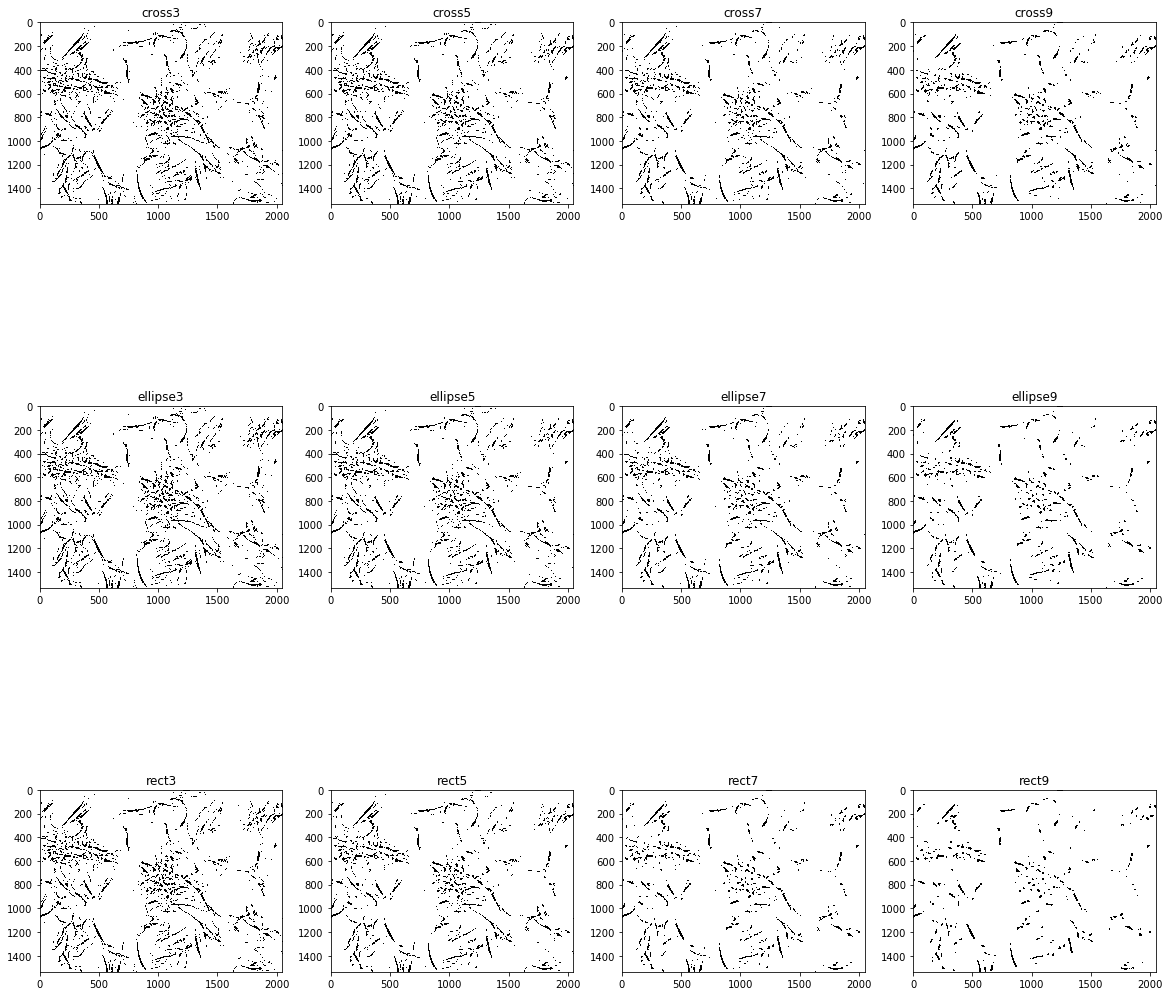

In [18]:
dict_item_iterator = iter(kernel_dict.items())

nrows=3
ncols=4 
f, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))

row_cnt = 0
col_cnt = 0

while row_cnt < nrows:
    kernel_item = next(dict_item_iterator)
    kernel_type_size = kernel_item[0]
    kernel = kernel_item[1]
    
    imageMorphed = cv2.morphologyEx(thresh_image, cv2.MORPH_CLOSE, kernel, iterations=1)
    
    ax[row_cnt][col_cnt].imshow(imageMorphed)
    ax[row_cnt][col_cnt].set_title(f"{kernel_type_size}")
    
    col_cnt += 1
    
    if col_cnt >= ncols:
        col_cnt = 0
        row_cnt += 1